# Hello Aruco

In [1]:
import sys
import os
sys.path.append("/usr/local/OFF")

In [2]:
# assert os.path.exists('./calibration.pkl')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pyrealsense2 as rs
from PIL import Image
import cv2

from pyzbar.pyzbar import decode

pipeline = rs.pipeline()
config = rs.config()

In [4]:
config.enable_stream(rs.stream.color, 1280, 720, rs.format.bgr8, 30)
profile = pipeline.start(config)

# aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_1000)
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_1000)
parameters = cv2.aruco.DetectorParameters_create()

In [5]:
frames = pipeline.wait_for_frames()
frames

<pyrealsense2.frameset BGR8 #0 @1689262928545.662109>

In [6]:
frame = frames[0]
color_image = np.asanyarray(frame.get_data())
color_image = color_image[...,::-1].copy()

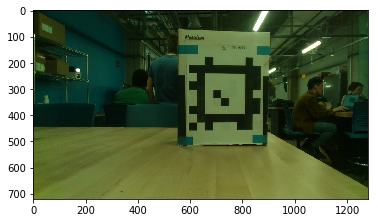

In [7]:
plt.imshow(color_image)
plt.show()

In [8]:
decode(color_image)

[]

In [9]:
accepted, ids, rejected = cv2.aruco.detectMarkers(color_image, aruco_dict, parameters=parameters)
accepted, ids, rejected

((),
 None,
 (array([[[595., 429.],
          [625., 429.],
          [626., 458.],
          [596., 459.]]], dtype=float32),
  array([[[720., 335.],
          [749., 335.],
          [749., 365.],
          [719., 365.]]], dtype=float32),
  array([[[689., 304.],
          [719., 304.],
          [718., 334.],
          [689., 334.]]], dtype=float32),
  array([[[600., 435.],
          [619., 433.],
          [621., 452.],
          [601., 454.]]], dtype=float32),
  array([[[726., 340.],
          [744., 341.],
          [742., 361.],
          [724., 359.]]], dtype=float32),
  array([[[695., 309.],
          [714., 310.],
          [712., 329.],
          [694., 328.]]], dtype=float32),
  array([[[466., 290.],
          [470., 315.],
          [467., 327.],
          [464., 301.]]], dtype=float32),
  array([[[946., 276.],
          [945., 280.],
          [928., 284.],
          [931., 280.]]], dtype=float32),
  array([[[653., 232.],
          [818., 238.],
          [814., 404.],
    

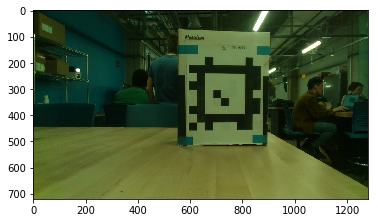

In [10]:
good_frame = cv2.aruco.drawDetectedMarkers(image=color_image, ids=ids, corners=accepted)

plt.imshow(good_frame)
plt.show()

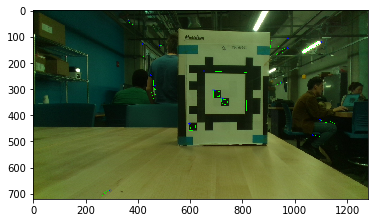

In [11]:
bad_frame = cv2.aruco.drawDetectedMarkers(image=color_image, corners=rejected)

plt.imshow(bad_frame)
plt.show()

In [12]:
im = Image.fromarray(good_frame)
im.save('test.jpg')